<a href="https://colab.research.google.com/github/RamAngothu/DEEP_LEARNING/blob/main/cat_vs_dog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the dataset from kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:11<00:00, 171MB/s]
100% 1.06G/1.06G [00:11<00:00, 102MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip")
zip_ref.extractall("/content")

In [6]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,BatchNormalization,Dropout

In [7]:
#GENERATORS
train_data = keras.utils.image_dataset_from_directory(
    directory = "/content/train",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size=(256,256),
)

validation_data = keras.utils.image_dataset_from_directory(
    directory = "/content/test",
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256),

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
#importing the VGG16 model (transefer learning)
from tensorflow.keras.applications import VGG16
from tensorflow.keras import Model
from keras.callbacks import EarlyStopping

# Loading the pre-trained VGG16 model without the top layers
base_model = VGG16(
    weights = "imagenet",
    include_top = False,
    input_shape = (256,256,3),
)

# Freeze the base model layers
base_model.trainable = False

# Adding custom layers on top of the pre-trained model
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)


model = Model(inputs=base_model.input, outputs=output)


early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.001,
    patience=2,
    verbose=1,
    mode='max',
)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_data, validation_data=validation_data,epochs=10,callbacks=[early_stopping])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 190s 275ms/step - accuracy: 0.9285 - loss: 1.2931 - val_accuracy: 0.9706 - val_loss: 0.1122
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 190s 281ms/step - accuracy: 0.9846 - loss: 0.0671 - val_accuracy: 0.9588 - val_loss: 0.3393
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 280ms/step - accuracy: 0.9869 - loss: 0.0747 - val_accuracy: 0.9620 - val_loss: 0.5054
Epoch 3: early stopping


In [9]:
model.save('cat vs dog classification.h5')

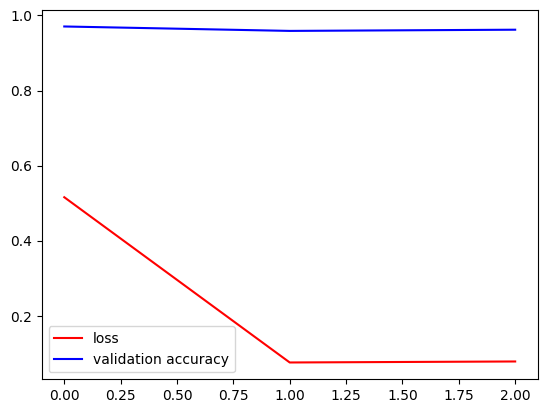

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='red',label='loss')
plt.plot(history.history['val_accuracy'],color='blue',label='validation accuracy')
plt.legend()
plt.show()


In [11]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 27,322,949 (104.23 MB)

 Trainable params: 4,202,753 (16.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 8,405,508 (32.06 MB)

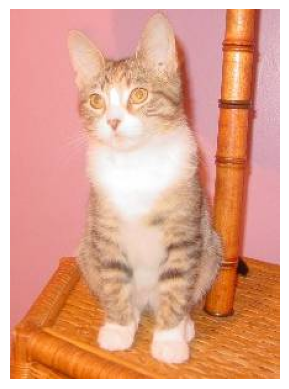

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Prediction: cat


In [12]:


from PIL import Image
import tensorflow as tf
from tensorflow import keras


# Loading the trained model
model_path = '/content/cat vs dog classification.h5'
model = tf.keras.models.load_model(model_path)



image_size = (256,256)

image_path = '/content/test/cats/cat.10007.jpg'

# Process the image for the model
image = Image.open(image_path)

# Display the image using Matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axis
plt.show()

# Preprocess the image for the model
img_array = np.array(image.resize(image_size))
img_array = np.expand_dims(img_array, axis=0)

# Make prediction
prediction = model.predict(img_array)

# Display the prediction result
class_names = ['Cat', 'Dog']
threshold = 0.5
predicted_class = 'dog' if prediction > threshold else 'cat'
confidence = prediction.item()

print(f"Prediction: {predicted_class}")

In [ ]:
GITHUB